In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

GETTING THE WHOLE DATASET

In [2]:
df = pd.read_csv('./WDI_csv/WDIData.csv');

GETTING THE COUNTRIES DATA TO FILTER THE UNWANTED REGIONS(ARAB WORLD, CARRIBBEAN SMALL STATES ETC)

In [3]:
countries_df = pd.read_csv('./WDI_csv/WDICountry.csv');
countries_df.dropna(subset=['Currency Unit' , '2-alpha code', 'WB-2 code'], inplace= True);
countries_df = countries_df[['Country Code', 'Table Name']]

Function to get rid of unwanted countries

In [4]:
def df_by_indicator(indicator):
    return df[ (df['Indicator Code'] == indicator) & (df['Country Code'].isin(countries_df['Country Code']))]

FILTERING THE DATASET FOR POPULATION

In [24]:
df_pop = df_by_indicator('SP.POP.GROW')
df_pop.drop()
df_pop.head()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

FILTERING THE DATASET FOR GDP

In [7]:
df_gdp = df_by_indicator('NY.GDP.MKTP.KD.ZG')
df_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
75728,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,21.020649,8.433290,6.113685,14.434741,3.900575,2.690522,1.310040,2.366712,2.595542,NaN
77328,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.352610,3.710058,2.550161,1.419968,1.000755,1.774369,2.218752,3.352159,3.841364,NaN
78928,Algeria,DZA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,-13.605441,-19.685042,34.313729,5.839413,6.206898,...,1.632244,3.634145,2.891866,3.374769,2.767639,3.789121,3.763467,3.300000,1.700000,NaN
80528,American Samoa,ASM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.237288,0.442478,0.293686,-4.392387,-2.756508,0.944882,1.248050,-2.619414,NaN,NaN
82128,Andorra,AND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.690654,-5.358826,-4.646543,-1.615218,0.351645,2.277683,0.842204,1.889124,1.873197,NaN
83728,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.412910,3.452875,3.873331,5.177594,6.842717,4.703971,2.999747,-0.813494,0.721699,NaN
85328,Antigua and Barbuda,ATG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-12.107536,-7.200024,-2.079127,3.506609,-0.103939,5.101940,4.060219,5.342479,3.337049,NaN
86928,Argentina,ARG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,...,-5.918525,10.125398,6.003952,-1.026420,2.405324,-2.512615,2.731160,-1.822542,2.863923,NaN
88528,Armenia,ARM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-14.149989,2.200000,4.700000,7.200000,3.300000,3.600000,3.200000,0.200000,7.500000,NaN
90128,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.653502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
len(df_pop)

215

In [9]:
df_gni = df_by_indicator('NY.GNP.PCAP.PP.CD')
low_income_countries = df_gni[df_gni['2017'] < 1005]
high_income_countries = df_gni[df_gni['2017'] > 12235]
df_gni

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
75761,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1490.0,1590.0,1680.0,1900.0,1940.0,1950.0,1940.0,1970.0,2000.0,NaN
77361,Albania,ALB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8670.0,9540.0,10210.0,10450.0,10750.0,11360.0,11470.0,11750.0,12120.0,NaN
78961,Algeria,DZA,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,12130.0,12580.0,12850.0,13160.0,13420.0,13900.0,14220.0,14870.0,15050.0,NaN
80561,American Samoa,ASM,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82161,Andorra,AND,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83761,Angola,AGO,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5200.0,5210.0,5360.0,5550.0,5900.0,6130.0,6250.0,6090.0,6060.0,NaN
85361,Antigua and Barbuda,ATG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,19430.0,18310.0,17960.0,18580.0,18980.0,20040.0,20970.0,22090.0,22980.0,NaN
86961,Argentina,ARG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,16110.0,17710.0,19070.0,19120.0,19730.0,19400.0,19630.0,19260.0,20270.0,NaN
88561,Armenia,ARM,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6590.0,6890.0,7270.0,7950.0,8490.0,8790.0,9090.0,9020.0,10060.0,NaN
90161,Aruba,ABW,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#low_income_countries
Lname = low_income_countries["Country Name"]
Lname

125361                     Burundi
134961    Central African Republic
146161            Congo, Dem. Rep.
254961                     Liberia
306161                       Niger
Name: Country Name, dtype: object

In [11]:
Lgni = low_income_countries["2017"]
Lgni

125361    770.0
134961    730.0
146161    870.0
254961    710.0
306161    990.0
Name: 2017, dtype: float64

In [12]:
low_income_countries

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
125361,Burundi,BDI,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,730.0,740.0,770.0,790.0,820.0,840.0,800.0,780.0,770.0,NaN
134961,Central African Republic,CAF,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,830.0,870.0,910.0,960.0,620.0,630.0,660.0,690.0,730.0,NaN
146161,"Congo, Dem. Rep.",COD,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,590.0,620.0,650.0,680.0,700.0,760.0,800.0,850.0,870.0,NaN
254961,Liberia,LBR,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,580.0,590.0,680.0,670.0,720.0,710.0,720.0,700.0,710.0,NaN
306161,Niger,NER,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,750.0,790.0,800.0,860.0,880.0,940.0,950.0,970.0,990.0,NaN


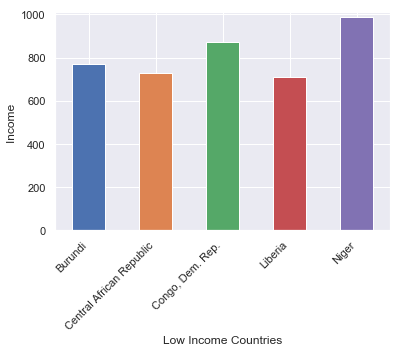

In [13]:
sns.set()
fig = low_income_countries["2017"].plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Income ')
plt.xlabel('Low Income Countries')
fig.set_xticklabels(low_income_countries["Country Name"], rotation = 45, ha="right")
plt.show()

/usr/local/Cellar/ipython/7.0.1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


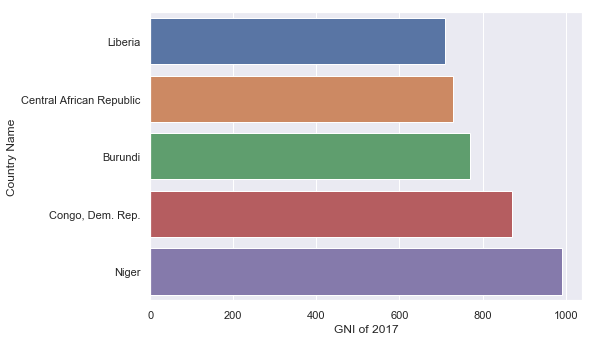

In [14]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1]);

low_income_countries.sort_values(by='2017', ascending=1,inplace=True)
g = sns.barplot(x='2017',y='Country Name', data=low_income_countries, ax=axes)
axes.set_xlabel("GNI of 2017")
plt.show()

/usr/local/Cellar/ipython/7.0.1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


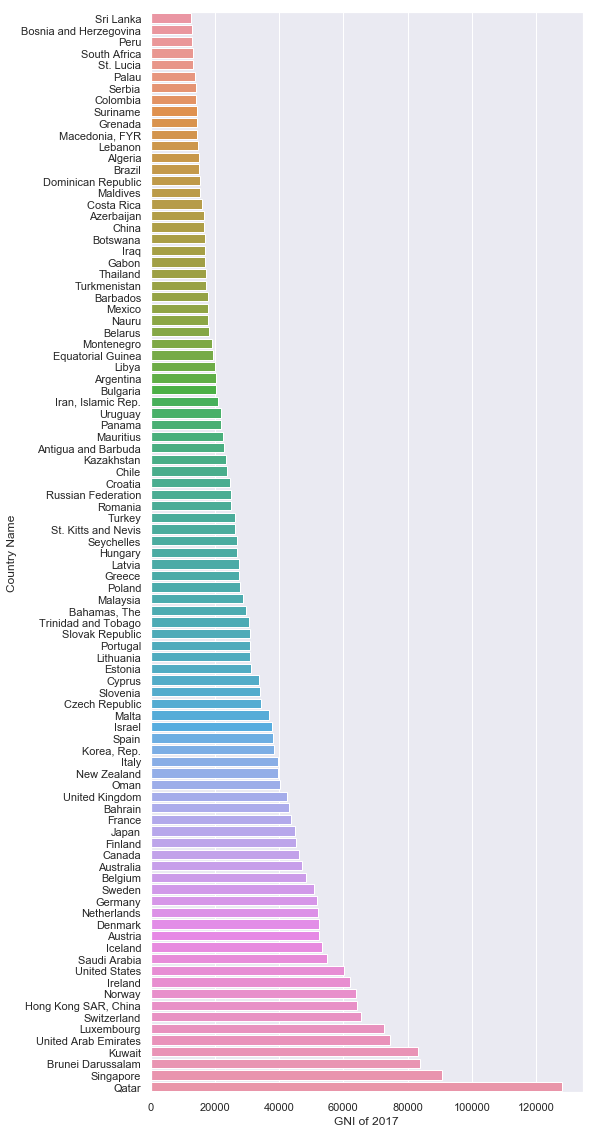

In [15]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1]);
fig.set_figheight(15);
high_income_countries.sort_values(by='2017', ascending=1,inplace=True)
g = sns.barplot(x='2017',y='Country Name', data=high_income_countries, ax=axes)
axes.set_xlabel("GNI of 2017")
plt.show()

# Joining GDP, GNI, Population Growth Table

In [16]:
df_pop = df_by_indicator('SP.POP.GROW')
df_pop.drop(['Country Code', 'Indicator Name', 'Indicator Code','Unnamed: 62'], axis=1,inplace=True)
df_pop = pd.melt(df_pop,id_vars=['Country Name'], var_name="Year", value_name="PG")
df_pop.set_index(['Country Name', 'Year'], inplace=True)
df_pop.head()

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,,PG
Country Name,Year,
Afghanistan,1960,1.816077
Albania,1960,3.015423
Algeria,1960,2.511434
American Samoa,1960,1.403903
Andorra,1960,7.050663


In [17]:
df_gni = df_by_indicator('NY.GNP.PCAP.PP.CD')
df_gni.drop(['Country Code', 'Indicator Name', 'Indicator Code','Unnamed: 62'], axis=1,inplace=True)
df_gni = pd.melt(df_gni,id_vars=['Country Name'], var_name="Year", value_name="GNI")
df_gni.set_index(['Country Name', 'Year'], inplace=True)
df_gni.head()

,,GNI
Country Name,Year,
Afghanistan,1960,NaN
Albania,1960,NaN
Algeria,1960,NaN
American Samoa,1960,NaN
Andorra,1960,NaN


In [18]:
df_gdp = df_by_indicator('NY.GDP.MKTP.KD.ZG')
df_gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code','Unnamed: 62'], axis=1,inplace=True)
df_gdp = pd.melt(df_gdp,id_vars=['Country Name'], var_name="Year", value_name="GDP")
df_gdp.set_index(['Country Name', 'Year'], inplace=True)
df_gdp.head()

,,GDP
Country Name,Year,
Afghanistan,1960,NaN
Albania,1960,NaN
Algeria,1960,NaN
American Samoa,1960,NaN
Andorra,1960,NaN


In [19]:
df_all = df_pop.join(df_gdp, how='inner').join(df_gni, how='inner')
df_all.index = df_all.index.rename(['Country', 'Year'])
df_all.head()

,,PG,GDP,GNI
Country,Year,,,
Afghanistan,1960,1.816077,NaN,NaN
Albania,1960,3.015423,NaN,NaN
Algeria,1960,2.511434,NaN,NaN
American Samoa,1960,1.403903,NaN,NaN
Andorra,1960,7.050663,NaN,NaN


# Task 1: General Relation Population To GNI

In [20]:
LOW_INCOME_THRESHOLD = 1005
HIGH_INCOME_THRESHOLD = 12235

def country_names_by_gni_threshold(thresh, year='2017'):
    temp = df_all.reset_index()
    return temp[(temp['Year'] == year) & (temp['GNI'] < thresh)]['Country'].values

## Low Income Countries

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


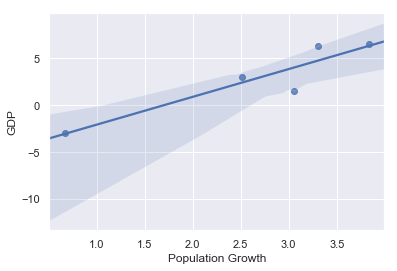

In [21]:
low_income_country_names = country_names_by_gni_threshold(LOW_INCOME_THRESHOLD)
df_low_income = df_all.query('Country in @low_income_country_names')

mean_pop_growth = []
mean_gdp = []
for country in low_income_country_names:
    country_mean = df_low_income.xs(country)['2012':'2017'].mean()
    mean_pop_growth.append(country_mean['PG'])
    mean_gdp.append(country_mean['GDP'])
    
data = pd.DataFrame({
    'GDP': mean_gdp,
    'Population Growth': mean_pop_growth
})

sns.regplot(x="Population Growth", y="GDP", data=data)

## High Income Countries

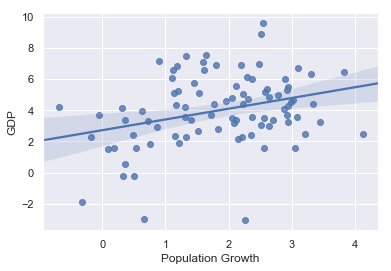

In [22]:
high_income_country_names = country_names_by_gni_threshold(HIGH_INCOME_THRESHOLD)
df_low_income = df_all.query('Country in @high_income_country_names')

mean_pop_growth = []
mean_gdp = []
for country in high_income_country_names:
    country_mean = df_low_income.xs(country)['2012':'2017'].mean()
    mean_pop_growth.append(country_mean['PG'])
    mean_gdp.append(country_mean['GDP'])
    
data = pd.DataFrame({
    'GDP': mean_gdp,
    'Population Growth': mean_pop_growth
})

sns.regplot(x="Population Growth", y="GDP", data=data)

## Task 1 Conclusion

As we can see from the regression plots above. In general, population growth has postive impact on economic growth of a country.

# Per year Annual Population Growth in %

In [23]:
pop_growth=[]
Years = []
for i in range(1960,2018):
    pop_growth.append(df_pop[str(i)].sum() / 215)
    Years.append(i)


KeyError: '1960'

#Created two lists and then merging them and forming a table which has Years from 1960-2017 and their respective growth of population(%)

In [ ]:
temp1 = pd.DataFrame(np.array(pop_growth))
temp2 = pd.DataFrame(np.array(Years))

frames = [temp2,temp1]

In [ ]:
yearly_pop_g = pd.concat(frames,axis=1)
yearly_pop_g.columns = ['Year','Annual Population Growth (%)']
yearly_pop_g.head()

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
x = sns.lineplot(x="Year", y="Annual Population Growth (%)", data=yearly_pop_g, size_order=1)

## Plot Linear Regression Population Growth

In [ ]:
sns.regplot(x="Year", y="Annual Population Growth (%)", data=yearly_pop_g);

## Create Linear Regression Model

In [ ]:
X = yearly_pop_g[['Year']]
y = yearly_pop_g['Annual Population Growth (%)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

## 

In [ ]:
y_prediction = lm.predict(X_test)
RMSE = np.mean((y_test - y_prediction)**2);
#Root mean squared error of our linear model is 0.01.
RMSE 

In [ ]:
R2_training = lm.score(X_test, y_test);
R2_test = lm.score(X_train, y_train);
[R2_training ,R2_test]

Since the R2 value of the LM on test set and training set is ~ 90% which explains that the linear model explains the variability in population well.

In [ ]:
#plotting the residuals
plt.figure(figsize=(20,2))
fig = sns.residplot(x=  X.values, y=(y - lm.predict(X)), color="g")
plt.xticks(X.values[0::2])
plt.yticks(np.arange(-0.4, 0.4, 0.2))
plt.show(fig)

In [ ]:
sns.distplot((y_test - y_prediction))


## Use model to predict up until year 2090 with 5 years interval

In [ ]:
predict_years = np.arange(2020,2100)
prediction_pop_g = lm.predict(predict_years.reshape(-1,1))

predicted_df = pd.DataFrame({
    'Year': predict_years,
    'Predicted Pop Growth (%)': prediction_pop_g
})
predicted_df = predicted_df[predicted_df['Predicted Pop Growth (%)'] <0].reset_index();
predicted_df[2:3]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

As per the linear regression model , the population growth will be zero 